### Importing the Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import ipywidgets
from ipywidgets import interact
plt.style.use('fivethirtyeight')

### Reading the Dataset

In [2]:
data = pd.read_csv('/Users/deepanshudubb/Documents/projects/Optimizing Agricultural Production using ML/data.csv')

In [3]:
data.shape

(2200, 8)

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


checking the presence of missing values

In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No. of crops present in the dataset

In [6]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Descriptive Statistics

In [7]:
# lets check the Summary for all the crops

print("Avg Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Avg Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Avg Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Avg Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Avg Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Avg PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Avg Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Avg Ratio of Nitrogen in the Soil : 50.55
Avg Ratio of Phosphorous in the Soil : 53.36
Avg Ratio of Potassium in the Soil : 48.15
Avg Tempature in Celsius : 25.62
Avg Relative Humidity in % : 71.48
Avg PH Value of the soil : 6.47
Avg Rainfall in mm : 103.46


In [9]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print(f"Average Value for {conditions} is {data[conditions].mean():.2f}")
    for label in data['label'].unique():
        print(f"{label}: {data[data['label'] == label][conditions].mean():.2f}")

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [10]:
# lets make this funtion more Intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### Analyzing Agricultural Conditions

visualizing various agricultural Conditions using histograms

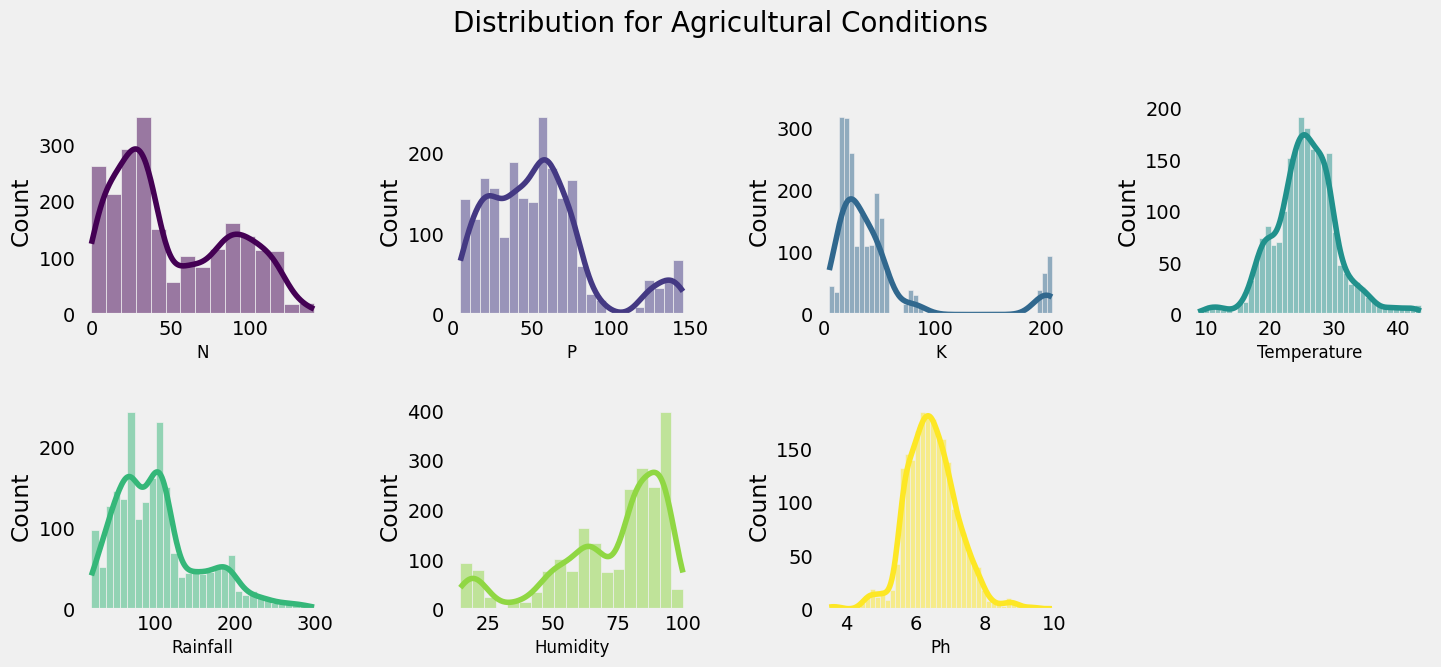

In [13]:
plt.rcParams['figure.figsize'] = (15, 7)

for i, col in enumerate(['N', 'P', 'K', 'temperature', 'rainfall', 'humidity', 'ph']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data[col], color=plt.cm.viridis(i/6), kde=True)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize=20)
plt.tight_layout(pad=2.0)
plt.show()

Key Findings from Crop Analysis

In [15]:
conditions = {
    'N': ('> 120', 'Nitrogen Content in Soil'),
    'P': ('> 100', 'Phosphorous Content in Soil'),
    'K': ('> 200', 'Potassium Content in Soil'),
    'rainfall': ('> 200', 'Rainfall'),
    'temperature': ('< 10', 'Temperature'), 
    'temperature': ('> 40', 'Temperature'),  
    'humidity': ('< 20', 'Humidity'),
    'ph': ('< 4', 'pH'),
    'ph': ('> 9', 'pH')  
}

for col, (condition, description) in conditions.items():
    print(f"Crops which requires very High {description}:", 
          data.query(f'{col} {condition}')['label'].unique())

Crops which requires very High Nitrogen Content in Soil: ['cotton']
Crops which requires very High Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very High Humidity: ['chickpea' 'kidneybeans']
Crops which requires very High pH: ['mothbeans']


Checking which crop can be grown in summer, winter and rainy season

In [18]:
seasons = {
    "Summer Crops":  (data['temperature'] > 30) & (data['humidity'] > 50),
    "Winter Crops": (data['temperature'] < 20) & (data['humidity'] > 30),
    "Rainy Crops": (data['rainfall'] > 200) & (data['humidity'] > 30)
}

for season, condition in seasons.items():
    print(season)
    print(data[condition]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops
['rice' 'papaya' 'coconut']


### Clustering the Similar Crops

In [19]:

import warnings
warnings.filterwarnings('ignore')

x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

print(x.shape)
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


Analysing the optimum no. of clusters within the dataset

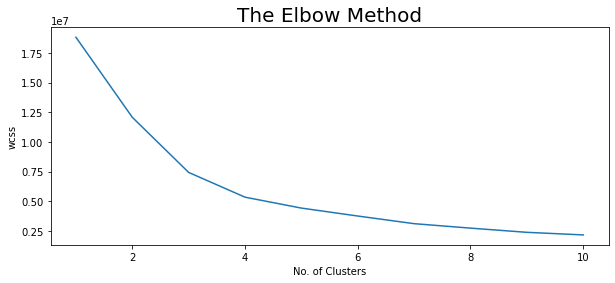

In [15]:
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Implementing the K-Means to perfrom cluster analysis

In [58]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

cluster_df = pd.DataFrame({'cluster': y_means, 'label': data['label']})

print("Results After Applying K-Means Clustering Analysis \n")
for i in range(4):
    print(f"Crops in Cluster {i+1}:", cluster_df[cluster_df['cluster'] == i]['label'].unique())
    print("---------------------------------------------------------------")

Results After Applying K-Means Clustering Analysis 

Crops in Cluster 1: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Cluster 2: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Cluster 3: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Cluster 4: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------


In [27]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

z = pd.DataFrame({'cluster': y_means, 'label': data['label']})
print("Results After Applying K-Means Clustering Analysis \n")
for i in range(4):
    print(f"Crops in Cluster {i+1}:", z[z['cluster'] == i]['label'].unique())
    print("---------------------------------------------------------------")

Results After Applying K-Means Clustering Analysis 

Crops in Cluster 1: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Cluster 2: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Cluster 3: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Cluster 4: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------


Hard Clustering

In [28]:
for i in range(4):  # Loop through clusters 0 to 3
    counts = z[z['cluster'] == i]['label'].value_counts()
    d = z.loc[z['label'].isin(counts.index[counts >= 50])]
    d = d['label'].value_counts()
    print(f"Crops in Cluster {i+1}:", list(d.index))
    print("--------------------------------------------------")

Crops in Cluster 1: ['grapes', 'apple']
--------------------------------------------------
Crops in Cluster 2: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Crops in Cluster 3: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']
--------------------------------------------------


### visualizing the Hidden Patterns

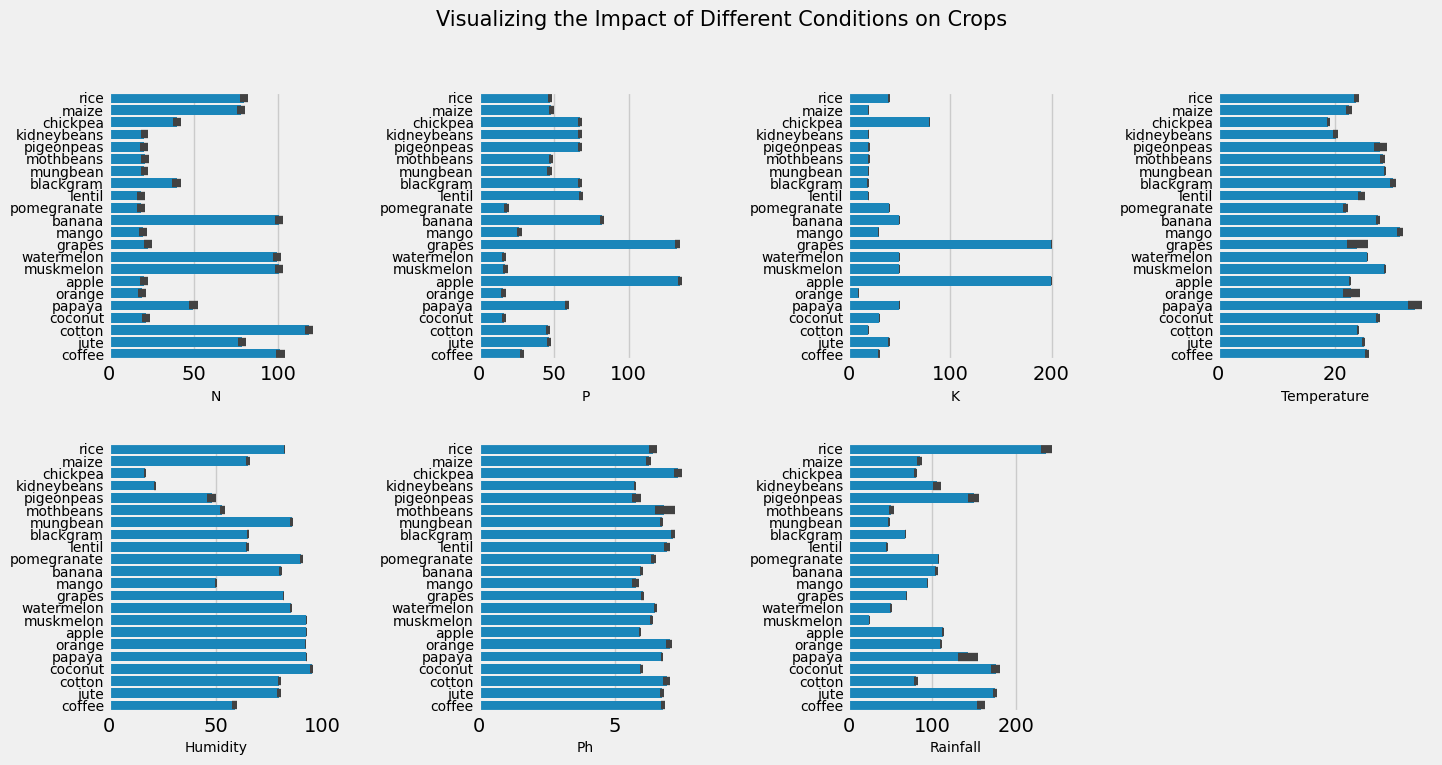

In [31]:
plt.rcParams['figure.figsize'] = (15, 8)

conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for i, condition in enumerate(conditions):
    plt.subplot(2, 4, i + 1)
    sns.barplot(x=data[condition], y=data['label'])
    plt.ylabel('') 
    plt.xlabel(condition.capitalize(), fontsize=10)
    plt.yticks(fontsize=10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize=15)
plt.tight_layout(pad=2.0)
plt.show()

### Predictive Modelling

In [39]:

y = data['label']
x = data.drop(['label'], axis = 1)


Splitting the data into Train and Test sets

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


Creating the Predictive Model using Logistic Regression

In [44]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Visualizing the Confusion Matric 

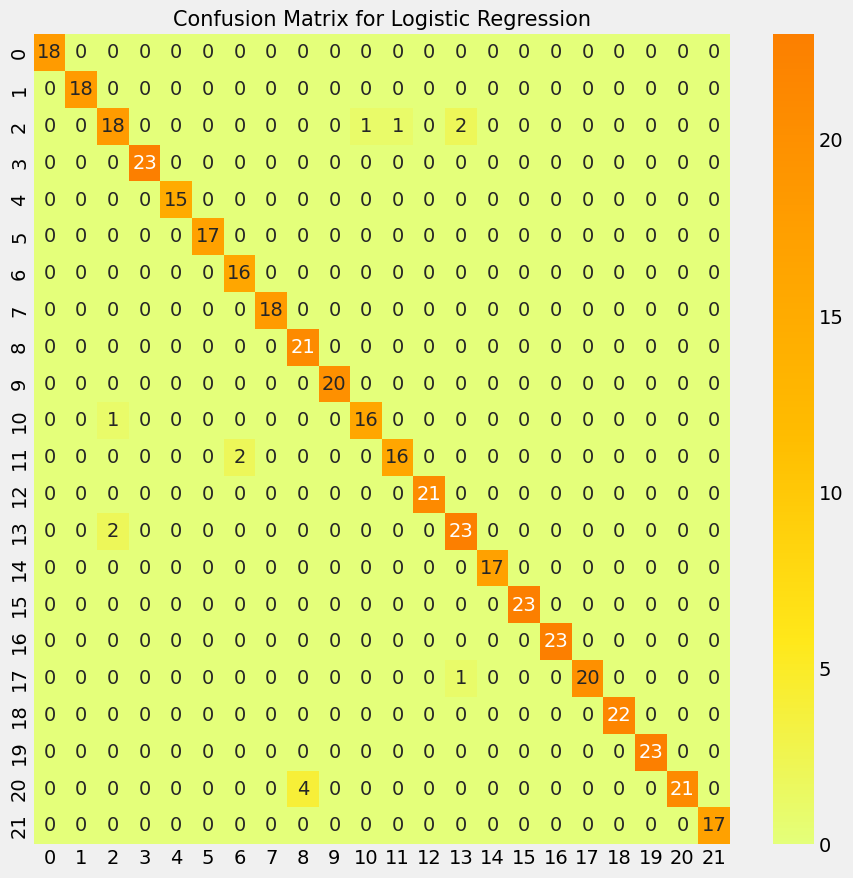

In [49]:
plt.rcParams['figure.figsize'] = (10, 10)
conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

Printing the Classification Report

In [50]:
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

### Real time Predictions

In [51]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [59]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [60]:
#checking the requirement for the orange
data[data['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange


In [61]:
prediction = model.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']


creating an interactive interface where users can input the values using sliders and get real-time predictions.

In [57]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
  """Predicts the most suitable crop for given conditions."""
  input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
  prediction = model.predict(input_features)
  print("The suggested crop for the given climatic conditions is:", prediction[0])

# Use ipywidgets for interactive input (if in a Jupyter environment)
from ipywidgets import interact, IntSlider, FloatSlider

interact(predict_crop,
         N=IntSlider(min=0, max=140, step=1, value=20),
         P=IntSlider(min=0, max=140, step=1, value=30),
         K=IntSlider(min=0, max=200, step=1, value=10),
         temperature=IntSlider(min=0, max=40, step=1, value=15),
         humidity=IntSlider(min=0, max=100, step=1, value=90),
         ph=FloatSlider(min=0, max=14, step=0.1, value=7.5),
         rainfall=IntSlider(min=0, max=300, step=1, value=100))

interactive(children=(IntSlider(value=20, description='N', max=140), IntSlider(value=30, description='P', max=…

<function __main__.predict_crop(N, P, K, temperature, humidity, ph, rainfall)>

In [62]:
import pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)